In [1]:
import os

In [2]:
os.chdir("/home/matvey/data/LshCas13a_RNA_cleavage/LshCas13a_C3000/")

In [3]:
TCS_table = "Results/Tables/TCS_detection_tables/LRTest_table.tsv"
T_TSS_table = "Results/Tables/TSS_detection_tables/T_cells_TSS_predictions.tsv"

In [4]:
import pandas as pd

In [5]:
TCS_DF = pd.read_csv(TCS_table, sep="\t")
T_TSS_DF = pd.read_csv(T_TSS_table, sep="\t")

In [6]:
TCS_DF.sort_values(by="PValue.adj", ascending=True, inplace=True)
T_TSS_DF.sort_values(by="PValue.adj", ascending=True, inplace=True)

In [7]:
TCS_DF.head()

,SeqID,Pos,Strand,logFC,logCPM,LR,PValue,PValue.adj
0,NC_000913.3,2716521,-,-8.437999,7.503037,239.021455,6.427968e-54,5.655069e-49
1,NC_000913.3,4540962,+,10.301635,5.383414,224.842339,7.946885e-51,3.495676e-46
2,NC_000913.3,2716291,-,-9.658506,5.561311,223.986410,1.221464e-50,3.581983e-46
3,NC_000913.3,2352451,-,-9.804095,5.699019,220.026273,8.925916e-50,1.963166e-45
4,NC_000913.3,3088620,+,-7.319793,8.295285,215.302668,9.572842e-49,1.684361e-44


In [8]:
T_TSS_DF.head()

,SeqID,Pos,Strand,logFC,logCPM,LR,PValue,PValue.adj
0,NC_000913.3,4035239,+,6.579625,7.544219,171.331381,3.787792e-39,4.230585e-35
1,NC_000913.3,3941516,+,6.456402,7.637585,166.394699,4.535745e-38,1.688658e-34
2,NC_000913.3,4166367,+,6.693705,7.327556,166.736094,3.820110e-38,1.688658e-34
3,NC_000913.3,2282441,+,6.583028,4.020348,154.571484,1.737155e-35,4.850570e-32
4,NC_000913.3,3195240,-,5.957071,6.537750,153.535451,2.925851e-35,6.535767e-32


In [9]:
def CreateLociList(DF, N):
    DF_subset = DF.head(N)
    LociList = ["_".join(i) for i in zip(DF_subset["SeqID"], DF_subset["Pos"].map(str), DF_subset["Strand"])]
    if len(set(LociList)) != N:
        print("Duplicates in the DF!")
    return(LociList)

In [10]:
N = 1000
TCS_Loci_top1000 = CreateLociList(TCS_DF, N)
T_TSS_Loci_top1000 = CreateLociList(T_TSS_DF, N)

In [11]:
len(set(TCS_Loci_top1000))

1000

In [12]:
len(set(T_TSS_Loci_top1000))

1000

In [20]:
TCS_TSS_overlap = 2*N-len(set(T_TSS_Loci_top1000 + TCS_Loci_top1000))

In [21]:
from matplotlib_venn import venn2
from matplotlib import pyplot as plt

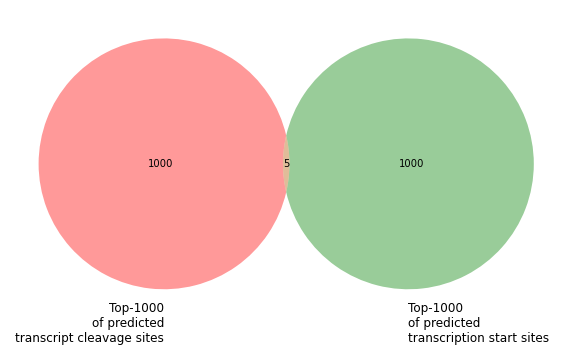

In [35]:
figure = plt.figure(figsize=(10, 10))
venn2(subsets=(N, N, TCS_TSS_overlap), 
      set_labels=("Top-1000\nof predicted\ntranscript cleavage sites", "Top-1000\nof predicted\ntranscription start sites"))
plt.savefig("Results/Pictures/TCS_vs_TSS_venn.png", dpi=300)

In [34]:
?plt.savefig